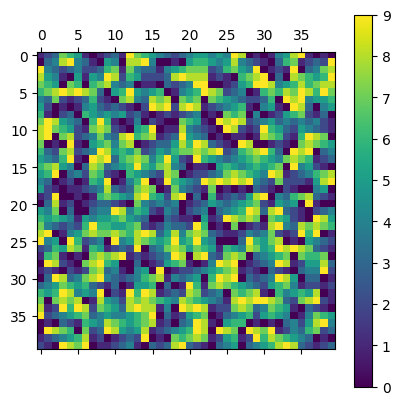

{(23, 7): 3, (5, 35): 3, (14, 17): 2, (19, 30): 3, (17, 17): 3, (7, 34): 9, (34, 5): 5, (10, 25): 7, (28, 24): 4, (36, 21): 2, (2, 0): 3, (3, 30): 7, (27, 11): 2, (13, 36): 7, (28, 26): 4, (17, 39): 2, (30, 8): 3, (14, 21): 6, (25, 0): 3, (4, 29): 7, (3, 19): 1, (17, 9): 2, (13, 30): 7, (39, 3): 2, (9, 24): 7, (11, 36): 5, (5, 3): 3, (6, 35): 9, (33, 27): 6, (32, 8): 1, (9, 1): 3, (32, 14): 5, (10, 15): 3, (24, 1): 3, (4, 21): 2, (12, 4): 7, (39, 33): 3, (39, 6): 1, (19, 14): 3, (37, 1): 2, (30, 24): 8, (35, 15): 5, (17, 26): 5, (33, 29): 6, (16, 2): 5, (23, 32): 3, (37, 21): 3, (9, 26): 7, (2, 29): 7, (21, 28): 6, (22, 25): 6, (31, 20): 4, (28, 8): 3, (1, 39): 3, (14, 9): 4, (17, 22): 5, (26, 34): 6, (25, 4): 3, (26, 32): 4, (17, 24): 8, (25, 10): 3, (22, 37): 3, (37, 28): 2, (25, 18): 4, (30, 26): 8, (15, 13): 3, (13, 34): 5, (12, 21): 6, (5, 22): 7, (5, 5): 6, (16, 31): 5, (7, 20): 2, (17, 14): 3, (6, 33): 4, (29, 38): 2, (32, 3): 7, (10, 1): 1, (14, 7): 1, (24, 14): 1, (14, 4): 4, 

In [89]:
import numpy as np
import matplotlib.pyplot as plt

tm = []
with open('input.txt', 'r') as f:
    for line in f:
        tm.append([int(n) for n in line.strip()])

top_map = np.array(tm)

plt.matshow(top_map)
plt.colorbar()
plt.show()

start_pos = np.where(top_map == 0)
# change into list of tuples
start_pos = [(int(a), int(b)) for a, b in list(zip(start_pos[0], start_pos[1]))]

move_list = [(0, 1), (0, -1), (1, 0), (-1, 0)]

def get_next_moves(pos):
    next_moves = []
    for move in move_list:
        next_pos = (pos[0] + move[0], pos[1] + move[1])
        if next_pos[0] < 0 or next_pos[1] < 0 or next_pos[0] >= top_map.shape[0] or next_pos[1] >= top_map.shape[1]:
            # out of bounds
            continue
        if top_map[pos[0], pos[1]] == top_map[next_pos[0], next_pos[1]] - 1:
            # valid move
            next_moves.append(next_pos)
    return next_moves




tuples = [(a, b) for a in range(top_map.shape[0]) for b in range(top_map.shape[1])]
move_dict = {pos: get_next_moves(pos) for pos in tuples}

paths = []

# exhaustively list all paths that end at 9, starting from each of the start positions
def find_paths(start_pos, path):
    if top_map[start_pos[0], start_pos[1]] == 9:
        paths.append(path)
        return
    for next_pos in move_dict[start_pos]:
        find_paths(next_pos, path + [next_pos])

for start_pos in start_pos:
    find_paths(start_pos, [start_pos])

# reverse 
paths = [path[::-1] for path in paths]

# pick first and last element of each path
paths = [(path[0], path[-1]) for path in paths]

# deduplicate
paths = list(set(paths))

trail_head_count = {}
for p in paths:
    if p[0] not in trail_head_count:
        trail_head_count[p[0]] = 1
    else:
        trail_head_count[p[0]] += 1

print(trail_head_count)

total_count = sum(trail_head_count.values())
print(total_count)

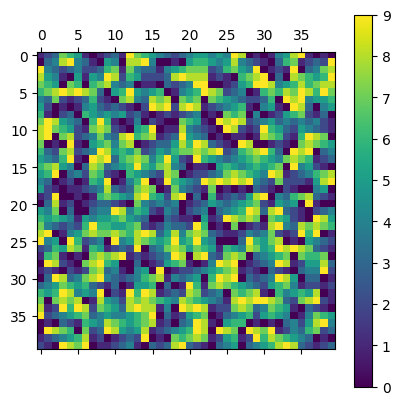

{(3, 9): 4, (5, 5): 7, (3, 30): 18, (4, 29): 18, (2, 29): 18, (3, 39): 8, (1, 39): 6, (2, 34): 6, (5, 35): 6, (2, 0): 7, (5, 3): 9, (5, 12): 1, (3, 19): 1, (4, 21): 4, (1, 14): 3, (6, 33): 8, (6, 35): 12, (7, 34): 12, (0, 35): 4, (0, 26): 3, (4, 22): 3, (1, 4): 1, (0, 12): 1, (5, 22): 18, (9, 26): 27, (9, 24): 9, (10, 25): 9, (9, 8): 15, (7, 20): 12, (4, 30): 1, (9, 1): 6, (12, 4): 11, (10, 15): 6, (13, 36): 16, (11, 36): 16, (13, 34): 12, (5, 38): 1, (10, 1): 1, (7, 17): 4, (7, 15): 4, (14, 21): 17, (12, 21): 19, (11, 12): 6, (14, 17): 3, (11, 19): 2, (16, 2): 10, (11, 1): 6, (13, 30): 33, (12, 27): 8, (17, 26): 34, (17, 24): 14, (13, 24): 2, (10, 30): 4, (13, 8): 6, (14, 9): 6, (15, 13): 6, (16, 31): 7, (19, 19): 6, (17, 17): 6, (15, 34): 4, (14, 4): 5, (17, 9): 2, (14, 7): 8, (19, 14): 7, (17, 14): 4, (21, 28): 31, (19, 30): 8, (22, 25): 23, (17, 22): 7, (17, 28): 10, (20, 36): 3, (17, 39): 4, (19, 2): 8, (23, 7): 16, (25, 21): 8, (23, 21): 8, (24, 1): 4, (25, 0): 4, (21, 10): 1, (2

In [92]:
import numpy as np
import matplotlib.pyplot as plt

tm = []
with open('input.txt', 'r') as f:
    for line in f:
        tm.append([int(n) for n in line.strip()])

top_map = np.array(tm)

plt.matshow(top_map)
plt.colorbar()
plt.show()

start_pos = np.where(top_map == 0)
# change into list of tuples
start_pos = [(int(a), int(b)) for a, b in list(zip(start_pos[0], start_pos[1]))]

move_list = [(0, 1), (0, -1), (1, 0), (-1, 0)]

def get_next_moves(pos):
    next_moves = []
    for move in move_list:
        next_pos = (pos[0] + move[0], pos[1] + move[1])
        if next_pos[0] < 0 or next_pos[1] < 0 or next_pos[0] >= top_map.shape[0] or next_pos[1] >= top_map.shape[1]:
            # out of bounds
            continue
        if top_map[pos[0], pos[1]] == top_map[next_pos[0], next_pos[1]] - 1:
            # valid move
            next_moves.append(next_pos)
    return next_moves

tuples = [(a, b) for a in range(top_map.shape[0]) for b in range(top_map.shape[1])]
move_dict = {pos: get_next_moves(pos) for pos in tuples}

paths = []

# exhaustively list all paths that end at 9, starting from each of the start positions
def find_paths(start_pos, path):
    if top_map[start_pos[0], start_pos[1]] == 9:
        paths.append(path)
        return
    for next_pos in move_dict[start_pos]:
        find_paths(next_pos, path + [next_pos])

for start_pos in start_pos:
    find_paths(start_pos, [start_pos])

# reverse 
paths = [path[::-1] for path in paths]

# pick first and last element of each path
paths = [(path[0], path[-1]) for path in paths]

# deduplicate
# paths = list(set(paths))

trail_head_count = {}
for p in paths:
    if p[0] not in trail_head_count:
        trail_head_count[p[0]] = 1
    else:
        trail_head_count[p[0]] += 1

print(trail_head_count)

total_count = sum(trail_head_count.values())
print(total_count)